## Método de Euler

## Exemplo 1 : y'=y*x com y(0)=1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def odeEuler(f,y0,t):
    
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

[1.         1.         1.04       1.1232     1.257984   1.45926144]


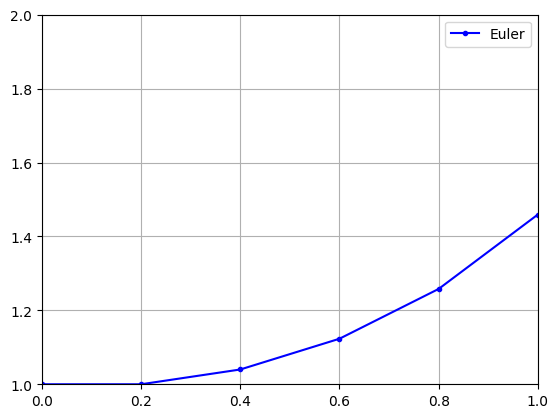

In [3]:
t = np.linspace(0,1,6)
y0 = 1
f = lambda y,t: y*t
y = odeEuler(f,y0,t)
print(y)
plt.plot(t,y,'b.-')
plt.legend(['Euler'])
plt.axis([0,1,1,2])
plt.grid(True)
plt.show()


# dsolve - python

In [4]:
import sympy as sym
import scipy as sp
import matplotlib.pyplot as plt
x = sym.symbols('x')
y= sym.symbols('y', cls=sym.Function)
sol=sym.Eq(y(x).diff(x)-y(x)*x, 0)
sol

Eq(-x*y(x) + Derivative(y(x), x), 0)

In [5]:
soln=sym.dsolve(sol,y(x))
soln

Eq(y(x), C1*exp(x**2/2))

## Cálculo da constante C1 com condição inicial

In [6]:
constants = sym.solve([soln.rhs.subs(x,0) - 1]) #condição inicial y(0)=1
display(constants)
resposta=soln.subs(constants)
display(resposta)

{C1: 1}

Eq(y(x), exp(x**2/2))

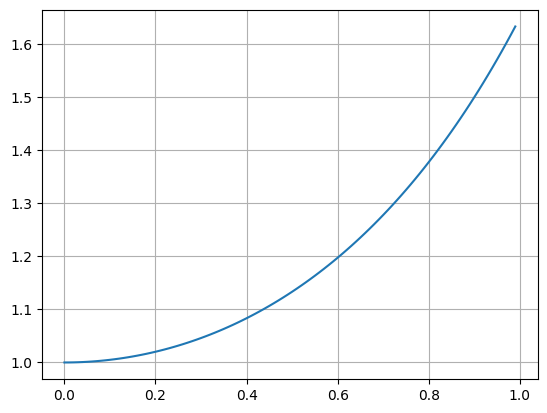

In [10]:
func = sym.lambdify(x,resposta.rhs,'numpy')
xx = np.arange(0,1,.01) 
y = func(xx)
plt.figure(1)
plt.grid(True)
plt.plot(xx,y);

## odeint - python

[[1.        ]
 [1.02020147]
 [1.08328722]
 [1.19721756]
 [1.377128  ]
 [1.64872159]]


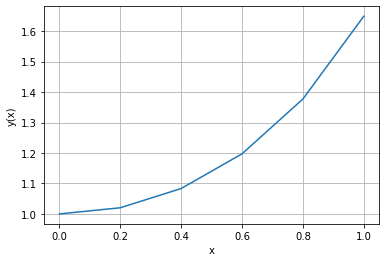

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# function that returns dy/dt
def model(y,t): 
    dydt = y*t
    return dydt
# initial condition
y0 = 1
# time points
t = np.linspace(0,1,6)
# solve ODE
y = odeint(model,y0,t)
print(y)
# plot results
plt.plot(t,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.show()

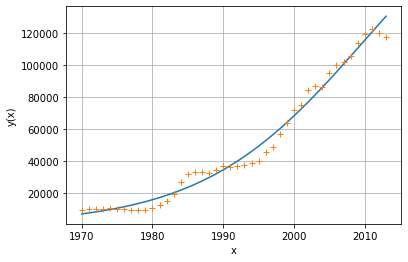

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# function that returns dy/dt
def model(y,t): 
    dydt=0.0873*y*(1-y/230000)

    return dydt
# initial condition
y0 = 6850
# time points
p=[9534, 9896, 9712, 9876, 10295, 9959, 9702, 9331, 9305, 9607, 10562, 
    12384, 15080, 19141, 26839, 31710, 33200, 32829, 32237, 34543, 36590, 
    36145, 36538, 37329, 38766, 40216, 45603, 48832, 56587, 63921, 71844, 
    75014, 84434, 87024, 86211, 94997, 100241, 101755, 105617, 113520, 119595, 
   122445, 120244, 117711];
t = np.linspace(1970,2013,44)
# solve ODE
y = odeint(model,y0,t)
# plot results
plt.plot(t,y,t,p,'+')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.show()





## Resolver a equação diferencial y''+5y'+6y=exp(t), com y(0)=1 e y'(0)=3

In [64]:
import sympy as sym
import scipy as sp
import matplotlib.pyplot as plt
t = sym.symbols('t')
y= sym.symbols('y', cls=sym.Function)
sol=sym.Eq(y(t).diff(t,2)+5*y(t).diff(t)+6*y(t), sym.exp(t))
sol

Eq(6*y(t) + 5*Derivative(y(t), t) + Derivative(y(t), (t, 2)), exp(t))

In [65]:
soln=sym.dsolve(sol,y(t))
soln

Eq(y(t), C1*exp(-3*t) + C2*exp(-2*t) + exp(t)/12)

In [66]:
sol=soln.rhs
dsol=sol.diff(t)
constants = sym.solve([sol.subs(t,0) - 1, dsol.subs(t,0) - 3] )#condição inicial y(0)=1
display(constants)
resposta=soln.subs(constants)
display(resposta)

{C1: -19/4, C2: 17/3}

Eq(y(t), exp(t)/12 + 17*exp(-2*t)/3 - 19*exp(-3*t)/4)

## Exemplo : y’=y*cos(x)  com y(0)=1

[[1.        ]
 [1.21977837]
 [1.47612173]
 [1.75881865]
 [2.04900842]
 [2.31977655]]


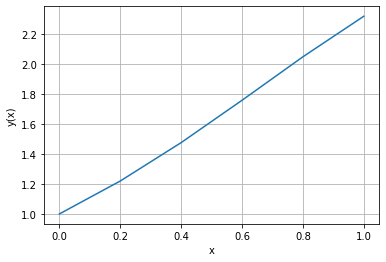

In [52]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# function that returns dy/dt
def model(y,t): 
    dydt = y*np.cos(t)
    return dydt
# initial condition
y0 = 1
# time points
t = np.linspace(0,1,6)
# solve ODEint
y = odeint(model,y0,t)
print(y)
# plot results
plt.plot(t,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.show()

In [58]:
import sympy as sym
import scipy as sp
import matplotlib.pyplot as plt
x = sym.symbols('x')
y= sym.symbols('y', cls=sym.Function)
sol=sym.Eq(y(x).diff(x)-y(x)*sym.cos(x), 0)
sol

Eq(-y(x)*cos(x) + Derivative(y(x), x), 0)

In [59]:
soln=sym.dsolve(sol,y(x))
soln

Eq(y(x), C1*exp(sin(x)))

In [63]:
constants = sym.solve([soln.rhs.subs(x,0) - 1]) #condição inicial y(0)=1
display(constants)
resposta=soln.subs(constants)
display(resposta)

{C1: 1}

Eq(y(x), exp(sin(x)))

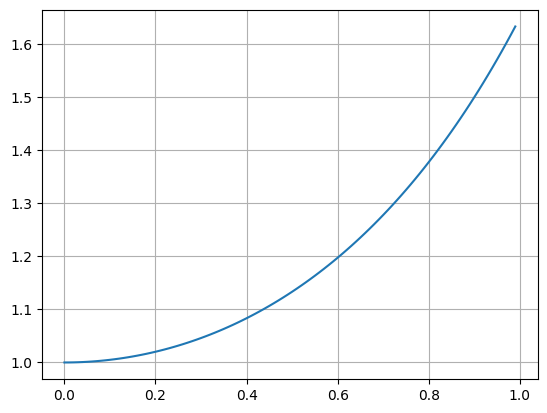

In [12]:
func = sym.lambdify(x,resposta.rhs,'numpy')
xx = np.arange(0,1,.01) 
y = func(xx)
plt.figure(1)
plt.grid(True)
plt.plot(xx,y);

# LAB

## 1

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def odeEuler(f,y0,t):
    
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

t = np.linspace(0,1,6)
y0 = 1
f = lambda y,t: t*y**2
y = odeEuler(f,y0,t)
print(y)


[1.         1.         1.04       1.126528   1.27881584 1.54047503]


{C1: -2}

Eq(y(x), -2/(x**2 - 2))

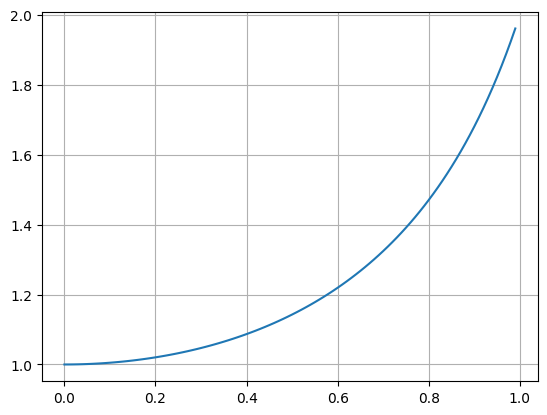

In [17]:
import sympy as sym
import scipy as sp
import matplotlib.pyplot as plt
x = sym.symbols('x')
y= sym.symbols('y', cls=sym.Function)
sol=sym.Eq(y(x).diff(x)-y(x)**2*x, 0)
sol

soln=sym.dsolve(sol,y(x))
soln

constants = sym.solve([soln.rhs.subs(x,0) - 1]) #condição inicial y(0)=1
display(constants)
resposta=soln.subs(constants)
display(resposta)

func = sym.lambdify(x,resposta.rhs,'numpy')
xx = np.arange(0,1,.01) 
y = func(xx)
plt.figure(1)
plt.grid(True)
plt.plot(xx,y);

## 2

[[2.        ]
 [2.10271319]
 [2.21174697]
 [2.32854438]
 [2.45469772]
 [2.59196485]]


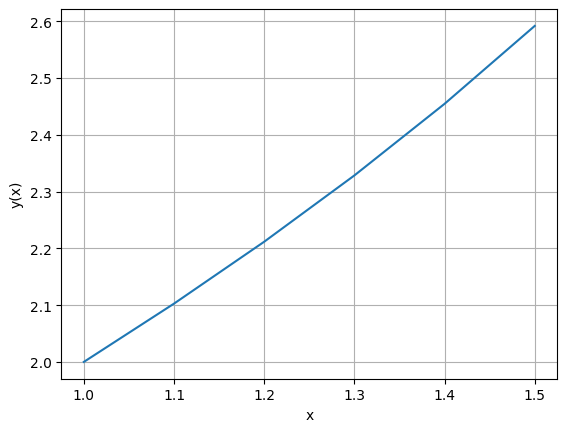

In [19]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# function that returns dy/dt
def model(y,t): 
    dydt = y-(2*t)/y
    return dydt
# initial condition
y0 = 2
# time points
t = np.linspace(1,1.5,6)
# solve ODE
y = odeint(model,y0,t)
print(y)
# plot results
plt.plot(t,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.show()

[2.         2.1        2.2052381  2.31693012 2.43640568 2.56512285]


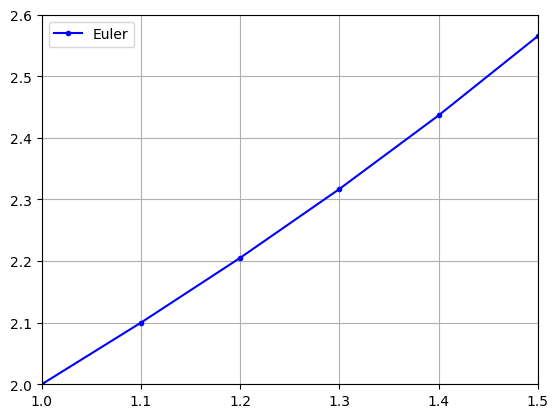

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def odeEuler(f,y0,t):
    
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

t = np.linspace(1,1.5,6)
f = lambda y,t: y-(2*t)/y
y = odeEuler(f,y0,t)
print(y)
plt.plot(t,y,'b.-')
plt.legend(['Euler'])
plt.axis([1,1.5,2,2.6])
plt.grid(True)
plt.show()